In [1]:
import pandas as pd
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_15752\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [17]:
train = pd.read_csv('image_data.csv')

In [18]:
test = pd.read_csv('test_data.csv')

In [19]:
X_train = train.drop('target',axis=1)
y_train = train['target']

X_test = test.drop('target',axis=1)
y_test = test['target']

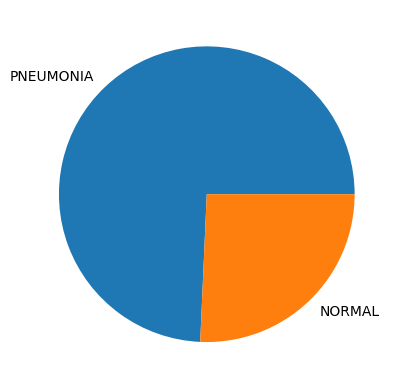

In [20]:
from matplotlib import pyplot as plt
plt.pie([y_train.value_counts()['PNEUMONIA'],y_train.value_counts()['NORMAL']],labels=['PNEUMONIA','NORMAL'])
plt.show()

In [9]:
np.sum(X_train.isnull().sum())

0

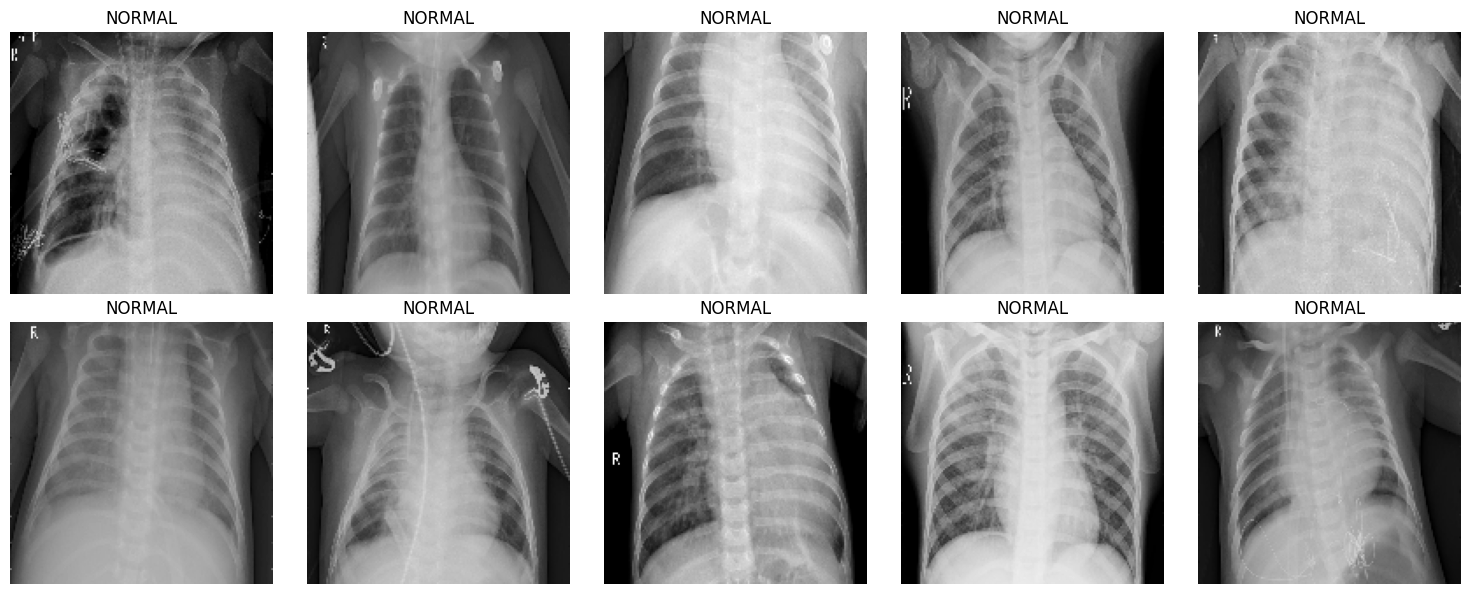

In [10]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X_train.iloc[i]).reshape(150,150), cmap='gray')
    ax.set_title('NORMAL')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [235]:
pneumonia = train[train['target'] == 'PNEUMONIA'].head(10)
pneumonia = pneumonia.drop('target',axis=1)

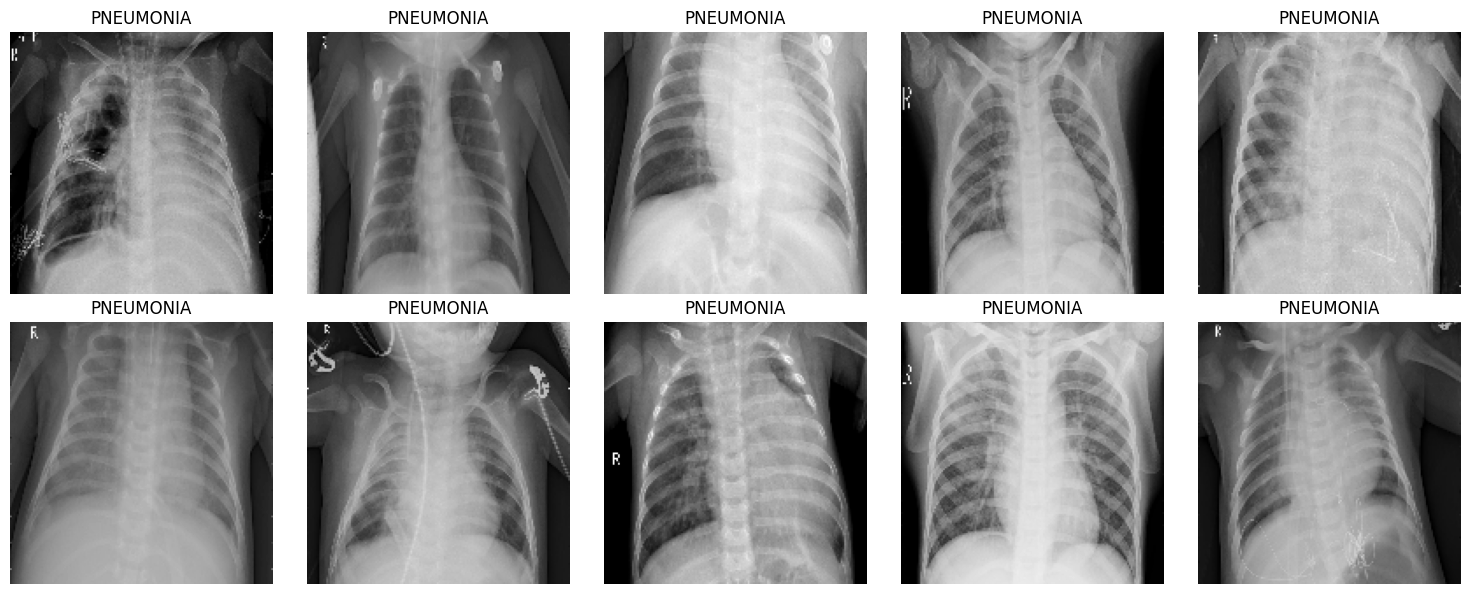

In [236]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(np.array(pneumonia.iloc[i])).reshape(150,150), cmap='gray')
    ax.set_title('PNEUMONIA')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [22]:
def scale(x):
    return (x - min(x))/ (max(x) - min(x))

In [23]:
X_train = X_train.apply(scale)

In [24]:
X_test = X_test.apply(scale)

In [25]:
y_train.replace({'PNEUMONIA':1,'NORMAL':-1},inplace=True)
y_test.replace({'PNEUMONIA':1,'NORMAL':-1},inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15752\2104371521.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({'PNEUMONIA':1,'NORMAL':-1},inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15752\2104371521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({'PNEUMONIA':1,'NORMAL':-1},inplace=True)


In [32]:
y_train.value_counts()

target
-1    1341
 1    1341
Name: count, dtype: int64

In [26]:
y_test.replace({0:-1},inplace=True)

In [37]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.svm import SVC
pipeline = Pipeline([
( "kmeans", KMeans(n_clusters=50, random_state=42) ),( "svc", SVC(C=0.3)),
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.8589743589743589

In [33]:
import joblib
pipeline = joblib.load('svm.joblib')

In [39]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.73      0.88      0.79       194
           1       0.94      0.85      0.89       430

    accuracy                           0.86       624
   macro avg       0.83      0.86      0.84       624
weighted avg       0.87      0.86      0.86       624



In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
("knn",KNeighborsClassifier(n_neighbors=5)),
])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.7868589743589743

In [209]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.51      0.87      0.64       137
           1       0.95      0.76      0.85       487

    accuracy                           0.79       624
   macro avg       0.73      0.82      0.74       624
weighted avg       0.86      0.79      0.80       624



In [218]:
import joblib
joblib.dump(pipeline,'knn.joblib')

['knn.joblib']

In [82]:
import numpy as np


class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
            print(f"{i} completed")
        self.w = w
        self.b = b

        return self.w, self.b, losses  

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [83]:
svm = SVM(C=0.3)
svm.fit(X_train.values, y_train.values)

0 completed
1 completed
2 completed
3 completed
4 completed
5 completed
6 completed
7 completed
8 completed
9 completed
10 completed
11 completed
12 completed
13 completed
14 completed
15 completed
16 completed
17 completed
18 completed
19 completed
20 completed
21 completed
22 completed
23 completed
24 completed
25 completed
26 completed
27 completed
28 completed
29 completed
30 completed
31 completed
32 completed
33 completed
34 completed
35 completed
36 completed
37 completed
38 completed
39 completed
40 completed
41 completed
42 completed
43 completed
44 completed
45 completed
46 completed
47 completed
48 completed
49 completed
50 completed
51 completed
52 completed
53 completed
54 completed
55 completed
56 completed
57 completed
58 completed
59 completed
60 completed
61 completed
62 completed
63 completed
64 completed
65 completed
66 completed
67 completed
68 completed
69 completed
70 completed
71 completed
72 completed
73 completed
74 completed
75 completed
76 completed
77 comple

(array([[-0.018506  , -0.00302656, -0.05483605, ..., -0.00211418,
          0.01651324,  0.018157  ]]),
 1.4504999999999666,
 [0.3,
  2.8221036526145975e-06,
  9.700151927169145,
  3.179214686245655e-05,
  6.431851015122646,
  6.568724127893615,
  7.284639631841158,
  4.263916171911681,
  1.9234784735249106,
  0.7604906816094424,
  3.2803013230697866,
  5.2288822177487955,
  0.6114392874187641,
  0.3304076161323397,
  2.077584071517791e-08,
  2.5605420819512377,
  3.0921377336525677,
  2.514708096553961,
  7.281721545614628e-07,
  7.521230139988676e-05,
  3.0086319452453933,
  0.11053639812049615,
  3.878112887872063e-06,
  2.951355979376776,
  6.269109356486559,
  4.078067589188089e-06,
  2.9443293750688726,
  1.351563122537904,
  2.4435177529478636,
  3.818447440196564e-06,
  0.39424086631069083,
  3.1904410406348864,
  1.2390085953554804e-05,
  2.904159483774914,
  2.0367567345586313,
  1.5125368941164625,
  1.2353170824254593e-05,
  0.05851734581557427,
  2.4623334929091756e-05,
  

In [90]:
with open("w.pkl","wb") as f:
    pickle.dump(svm.w,f)

In [98]:
with open("b.pkl","wb") as f:
    pickle.dump(svm.b,f)

In [99]:
with open("b.pkl","rb") as f:
    file = pickle.load(f)
    print(file)

1.4504999999999666


In [84]:
from sklearn.metrics import classification_report
print(classification_report(svm.predict(X_test),y_test))

              precision    recall  f1-score   support

        -1.0       0.76      0.81      0.78       221
         1.0       0.89      0.86      0.88       403

    accuracy                           0.84       624
   macro avg       0.83      0.83      0.83       624
weighted avg       0.84      0.84      0.84       624



In [174]:
class KNN:
    def __init__(self, n_neighbors=3):
        self.features = None
        self.outputs = None
        self.n_neighbors = 3
    def fit(self,X, y):
        self.features = X
        self.outputs = y
    def predict(self,X_test):
        ls = []
        for i in range(len(X_test)):
            indices = np.argsort(np.sqrt(np.sum((self.features - X_test.iloc[i])**2, axis=1)))[:self.n_neighbors]
            ls.append((self.outputs.iloc[indices]).mode())
        return ls

In [211]:
knn= KNN()
knn.fit(X_train, y_train)

In [214]:
pred = knn.predict(X_test)

In [215]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

          -1       0.50      0.88      0.63       132
           1       0.96      0.76      0.85       492

    accuracy                           0.79       624
   macro avg       0.73      0.82      0.74       624
weighted avg       0.86      0.79      0.80       624

